In [1]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn import svm
from numpy import mean
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

## DEMOGRAPHIC DATA

In [2]:
demo144 = pd.read_csv('./dem144.csv')

#EXTRACT FEATURES AND LABELS
Y144 = demo144['aki_flag'] 
X144 = demo144.iloc[:,2:] 

#TRANSFORM CATEGORICAL ATTRIBUTES INTO 0-1 VECTORS
X144 = pd.get_dummies(X144)

#NORMALIZATION WITH MIN-MAX SCALER 0-1
scaler = MinMaxScaler()
X144 = scaler.fit_transform(X144)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train144, X_test144, y_train144, y_test144 = tts(X144, Y144, test_size=0.3, random_state=42)

In [3]:
#APPLY THE SMOTE TOMEK-LINKS TECHNIQUE TO COPE WITH CLASS IMBALANCE PROBLEM 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#DEFINE THE PARAMETERS TO BE TESTED IN THE GRID SEARCH
params = [
  {'C': [0.1, 0.5, 0.75, 1, 10 ], 'kernel': ['poly'], 'degree': [1,2,3,4,6]},
  {'C': [0.1, 0.5, 0.75, 1, 10 ], 'kernel': ['rbf'], 'gamma': [0.5, 0.01, 0.1, 1, 10, 100]},
] 

In [4]:
gs144 = GridSearchCV(svm.SVC(), params, refit = True, verbose = 3)
p144 = Pipeline(steps=[('r', resample), ('gs', gs144)])

Now fit the grid search and extract the best parameters/estimator to be used fro the prediction 

In [5]:
gs144.fit(X_train144, y_train144)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.750 total time=   0.2s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.750 total time=   0.2s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.755 total time=   0.2s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.748 total time=   0.2s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.748 total time=   0.2s
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.750 total time=   0.2s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.750 total time=   0.2s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.755 total time=   0.2s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.748 total time=   0.2s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.748 total time=   0.2s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.750 total time=   0.2s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly

[CV 2/5] END .......C=10, degree=1, kernel=poly;, score=0.750 total time=   0.2s
[CV 3/5] END .......C=10, degree=1, kernel=poly;, score=0.748 total time=   0.2s
[CV 4/5] END .......C=10, degree=1, kernel=poly;, score=0.741 total time=   0.2s
[CV 5/5] END .......C=10, degree=1, kernel=poly;, score=0.748 total time=   0.2s
[CV 1/5] END .......C=10, degree=2, kernel=poly;, score=0.757 total time=   0.3s
[CV 2/5] END .......C=10, degree=2, kernel=poly;, score=0.757 total time=   0.3s
[CV 3/5] END .......C=10, degree=2, kernel=poly;, score=0.741 total time=   0.3s
[CV 4/5] END .......C=10, degree=2, kernel=poly;, score=0.755 total time=   0.3s
[CV 5/5] END .......C=10, degree=2, kernel=poly;, score=0.748 total time=   0.3s
[CV 1/5] END .......C=10, degree=3, kernel=poly;, score=0.750 total time=   0.5s
[CV 2/5] END .......C=10, degree=3, kernel=poly;, score=0.757 total time=   0.3s
[CV 3/5] END .......C=10, degree=3, kernel=poly;, score=0.727 total time=   0.4s
[CV 4/5] END .......C=10, de

[CV 4/5] END .......C=0.75, gamma=1, kernel=rbf;, score=0.748 total time=   0.4s
[CV 5/5] END .......C=0.75, gamma=1, kernel=rbf;, score=0.748 total time=   0.4s
[CV 1/5] END ......C=0.75, gamma=10, kernel=rbf;, score=0.764 total time=   0.4s
[CV 2/5] END ......C=0.75, gamma=10, kernel=rbf;, score=0.757 total time=   0.4s
[CV 3/5] END ......C=0.75, gamma=10, kernel=rbf;, score=0.741 total time=   0.4s
[CV 4/5] END ......C=0.75, gamma=10, kernel=rbf;, score=0.755 total time=   0.4s
[CV 5/5] END ......C=0.75, gamma=10, kernel=rbf;, score=0.741 total time=   0.4s
[CV 1/5] END .....C=0.75, gamma=100, kernel=rbf;, score=0.750 total time=   0.5s
[CV 2/5] END .....C=0.75, gamma=100, kernel=rbf;, score=0.743 total time=   0.5s
[CV 3/5] END .....C=0.75, gamma=100, kernel=rbf;, score=0.727 total time=   0.4s
[CV 4/5] END .....C=0.75, gamma=100, kernel=rbf;, score=0.748 total time=   0.5s
[CV 5/5] END .....C=0.75, gamma=100, kernel=rbf;, score=0.734 total time=   0.5s
[CV 1/5] END ........C=1, ga

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 0.5, 0.75, 1, 10],
                          'degree': [1, 2, 3, 4, 6], 'kernel': ['poly']},
                         {'C': [0.1, 0.5, 0.75, 1, 10],
                          'gamma': [0.5, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             verbose=3)

In [6]:
print("The best parameters found for the 24h DCW:")
print(gs144.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 24h DCW:")
print(gs144.best_estimator_)

The best parameters found for the 24h DCW:
{'C': 10, 'degree': 2, 'kernel': 'poly'}
The best estimator found for the 24h DCW:
SVC(C=10, degree=2, kernel='poly')


In [7]:
best144 = svm.SVC(C = 10, kernel = 'poly', degree = 2)

In [8]:
len(y_test144)

308

In [9]:
pred = gs144.predict(X_test144)

In [10]:
#CLASSIFICATION REPORT 
print(classification_report(y_test144, pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       222
           1       0.29      0.02      0.04        86

    accuracy                           0.71       308
   macro avg       0.50      0.50      0.44       308
weighted avg       0.60      0.71      0.61       308



In [11]:
#APPLY THE FUNCTION CROSS_VAL_PREDICT TO PREDICT THE OUTPUT WITH THE BEST ESTIMATOR FOUND
ypred144 = cross_val_predict(best144, X144, Y144, cv = 5)
ypred144

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
print(accuracy_score(Y144, ypred144))

0.7258536585365853


In [13]:
print(precision_score(Y144, ypred144))

0.19230769230769232


In [14]:
print(recall_score(Y144, ypred144))

0.018867924528301886


In [15]:
print(roc_auc_score(Y144, ypred144))

0.4956181727904667


In [16]:
print(f1_score(Y144, ypred144))

0.03436426116838488


In [17]:
#CLASSIFICATION REPORT 
print(classification_report(Y144, ypred144))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       760
           1       0.19      0.02      0.03       265

    accuracy                           0.73      1025
   macro avg       0.47      0.50      0.44      1025
weighted avg       0.60      0.73      0.63      1025



In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=3)
model.fit(X144, Y144)
print(model.feature_importances_)

[0.87125478 0.01622579 0.02128658 0.00928563 0.00489805 0.00797271
 0.00099624 0.00089261 0.00236588 0.00186435 0.0130228  0.00102539
 0.00162805 0.00115008 0.00357984 0.00180701 0.0045557  0.00428591
 0.00523166 0.00254147 0.00884027 0.00664924 0.00770745 0.00093252]


In [31]:
#columns_ = demo144.iloc[:,2:].columns

In [32]:
#feat_importances = pd.Series(model.feature_importances_, index = columns_)
#feat_importances.nlargest(3).plot(kind='barh')
#plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X144.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train144, y_train144)

RandomForestClassifier(random_state=0)

In [29]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.068 seconds


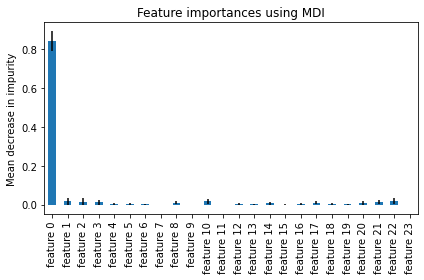

In [30]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [36]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Another way to select features is the following:

In [37]:
import matplotlib
import matplotlib.pyplot as plt

for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

Feature: 0, Score: 0.84015
Feature: 1, Score: 0.01829
Feature: 2, Score: 0.01511
Feature: 3, Score: 0.01207
Feature: 4, Score: 0.00393
Feature: 5, Score: 0.00466
Feature: 6, Score: 0.00127
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00971
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01780
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00428
Feature: 13, Score: 0.00110
Feature: 14, Score: 0.00678
Feature: 15, Score: 0.00064
Feature: 16, Score: 0.00457
Feature: 17, Score: 0.00931
Feature: 18, Score: 0.00563
Feature: 19, Score: 0.00234
Feature: 20, Score: 0.01038
Feature: 21, Score: 0.01221
Feature: 22, Score: 0.01979
Feature: 23, Score: 0.00000


NameError: name 'pyplot' is not defined